In [1]:
from bidcell import BIDCellModel
import pandas as pd
import numpy as np
import skimage.io as sio
import cv2

In [1]:
import sys
sys.path.append('../../../scripts/')

from paths import get_data_paths

In [3]:
data_path = get_data_paths('../../../data_mapping.yml')['mouse_gut']
rna_data_path = get_data_paths('../../../data_mapping.yml')['mouse_gut_rna']

In [2]:
DATA_FOLDER = data_path / 'seg_method_results' / 'bidcell'

## Prepare data

In [3]:
INPUT_DIR = DATA_FOLDER / 'input'

In [4]:
df = pd.read_csv(data_path / 'raw_data' / 'molecules.csv')

In [5]:
print(df.y_um.max() - df.y_um.min())
print((df.x_um.max() - df.x_um.min()) / (df.x_pixel.max() - df.x_pixel.min()))
print((df.y_um.max() - df.y_um.min()) / (df.y_pixel.max() - df.y_pixel.min()))

1023.222
0.10896576319543508
0.10895772548184432


In [6]:
dapi_img = sio.imread(data_path / 'raw_data' / 'dapi_stack.tif')

In [5]:
sio.imsave(INPUT_DIR / 'dapi.tif', dapi_img[4,:,:])

In [6]:
cm_full = pd.read_csv(rna_data_path / 'regional_sampling_UMIcounts.txt', sep='\t')
cm_full.set_index('GENE', inplace=True)
cm_full = cm_full.T

cell_meta = pd.read_csv(rna_data_path / 'mouse_int_meta.csv', index_col='NAME')
cell_meta = cell_meta.loc[cm_full.index]
cell_meta = cell_meta[cell_meta.Region == 'Ileum']
cm_full = cm_full.loc[cell_meta.index,:]

In [11]:
common_genes = sorted(set(df.gene.unique()) & set(cm_full.columns))
cm_full = cm_full.loc[:,common_genes]
cm_full.shape

(3927, 236)

In [12]:
cm_full['atlas'] = cell_meta.Mouse
cm_full['cell_type'] = cell_meta.Cluster
cm_full['ct_idx'] = pd.factorize(cm_full['cell_type'])[0]

In [13]:
cm_bulk = cm_full.groupby(['atlas', 'cell_type', 'ct_idx']).sum()
cm_bulk = np.log1p(10000 * (cm_bulk.T / cm_bulk.T.sum()).T).reset_index()
cm_bulk = pd.concat([cm_bulk.iloc[:,3:], cm_bulk[['ct_idx', 'cell_type', 'atlas']]], axis=1)

In [61]:
cm_bulk

GENE,Acsl1,Acta2,Ada,Adgrd1,Adgrf5,Adra1a,Adra1b,Adra1d,Adra2a,Adra2b,...,Tpsb2,Trpm5,Tspan13,Txndc5,Tymp,Vcan,Vim,ct_idx,cell_type,atlas
0,3.200296,0.000000,2.547091,0.904719,0.000000,0.0,0.0,0.0,2.843956,0.0,...,0.000000,0.904719,4.162987,4.936603,0.0,0.000000,0.000000,5,EP,m1
1,2.389191,0.000000,1.972749,1.783783,0.000000,0.0,0.0,0.0,1.245930,0.0,...,0.000000,0.805620,4.121734,4.541764,0.0,0.000000,1.245930,1,Enterocyte,m1
2,3.421252,0.000000,0.000000,0.000000,2.760254,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,5.004205,5.532066,0.0,2.128461,5.833314,7,Enteroendocrine,m1
3,2.726494,0.000000,2.540263,0.000000,0.000000,0.0,0.0,0.0,2.726494,0.0,...,0.832088,1.080844,7.032010,7.293332,0.0,0.000000,0.000000,0,Goblet,m1
4,1.109939,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.311633,0.0,...,0.000000,0.000000,5.207952,4.127541,0.0,0.000000,0.000000,4,Paneth,m1
5,3.400266,0.000000,2.776673,0.000000,0.000000,0.0,0.0,0.0,3.419414,0.0,...,0.000000,1.007346,4.606015,4.790528,0.0,0.457071,0.000000,2,Stem,m1
6,3.486181,0.000000,2.748089,0.000000,0.000000,0.0,0.0,0.0,3.324679,0.0,...,0.000000,0.000000,4.337281,5.007718,0.0,0.000000,0.000000,3,TA,m1
7,3.476551,0.000000,2.178946,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,6.235203,5.464297,4.374119,0.0,0.000000,0.000000,6,Tuft,m1
8,2.680866,0.757597,2.512152,0.000000,0.000000,0.0,0.0,0.0,1.481476,0.0,...,0.000000,0.757597,4.505553,4.815266,0.0,0.000000,0.757597,5,EP,m2
9,2.802008,0.000000,1.652725,0.878408,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,4.600102,4.780747,0.0,0.000000,0.878408,1,Enterocyte,m2


In [56]:
cm_bulk.to_csv(f'{INPUT_DIR}/sc_ref.csv')

In [16]:
df[df.gene.isin(common_genes)].to_csv(f'{INPUT_DIR}/molecules.csv', index=False)

### Find markers

Copied from https://github.com/SydneyBioX/BIDCell/issues/9

In [30]:
# import numpy as np
# import pandas as pd
import natsort

max_overlaps_neg = 15
max_overlaps_pos = 4

ref_df = cm_bulk
n_genes = ref_df.shape[1] - 3
print("Ref data shape", ref_df.shape)

Ref data shape (16, 239)


In [32]:
cell_types = ref_df["cell_type"].tolist()
cell_types = natsort.natsorted(list(set(cell_types)))
print(cell_types)
n_cell_types = len(cell_types)

ref_expr = ref_df.iloc[:, :n_genes].to_numpy()
gene_names = ref_df.columns[:n_genes]

# Find genes with expressions in bottom 10% percentile for every ref cell type
pct_10 = np.percentile(ref_expr, 10, axis=1, keepdims=True)
pct_10 = np.tile(pct_10, (1, n_genes))
low_expr_true = np.zeros(pct_10.shape)
low_expr_true[ref_expr <= pct_10] = 1

# Find overlap for different ref samples of the same cell type
ct_idx = ref_df["ct_idx"].to_numpy()
low_expr_true_agg = np.zeros((n_cell_types, n_genes))
for ct in range(n_cell_types):
    rows = np.where(ct_idx == ct)[0]
    low_expr_true_ct = low_expr_true[rows]
    low_expr_true_agg[ct, :] = np.prod(low_expr_true_ct, axis=0)

# Set overlaps to 0
overlaps = np.sum(low_expr_true_agg, 0)
too_many = np.where(overlaps > max_overlaps_neg)[0]
low_expr_true_agg[:, too_many] = 0

# print("num neg genes per cell type")
# print(np.sum(low_expr_true_agg, 1))

df_neg = pd.DataFrame(low_expr_true_agg, index=cell_types, columns=gene_names)

# Find genes with expressions in top 90% percentile for every ref cell type
pct_90 = np.percentile(ref_expr, 90, axis=1, keepdims=True)
pct_90 = np.tile(pct_90, (1, n_genes))
high_expr_true = np.zeros(pct_90.shape)
high_expr_true[ref_expr >= pct_90] = 1

# Find overlap for different ref samples of the same cell type
ct_idx = ref_df["ct_idx"].to_numpy()
high_expr_true_agg = np.zeros((n_cell_types, n_genes))
for ct in range(n_cell_types):
    rows = np.where(ct_idx == ct)[0]
    high_expr_true_ct = high_expr_true[rows]
    high_expr_true_agg[ct, :] = np.prod(high_expr_true_ct, axis=0)

# print("num pos genes per cell type")
# print(np.sum(high_expr_true_agg, 1))

# Set overlaps to 0
overlaps = np.sum(high_expr_true_agg, 0)
too_many = np.where(overlaps > max_overlaps_pos)[0]
high_expr_true_agg[:, too_many] = 0

df_pos = pd.DataFrame(high_expr_true_agg, index=cell_types, columns=gene_names)

['EP', 'Enterocyte', 'Enteroendocrine', 'Goblet', 'Paneth', 'Stem', 'TA', 'Tuft']


In [33]:
df_pos.to_csv(f'{INPUT_DIR}/sc_pos_markers.csv')
df_neg.to_csv(f'{INPUT_DIR}/sc_neg_markers.csv')

## Run BIDCell

In [32]:
model = BIDCellModel("merfish_ileum_config.yaml")

In [ ]:
model.preprocess()

Number of cells 24
Number of splits for multiprocessing: 5
Done
Number of cells: 24
Number of splits for multiprocessing: 5
Computing simple annotation


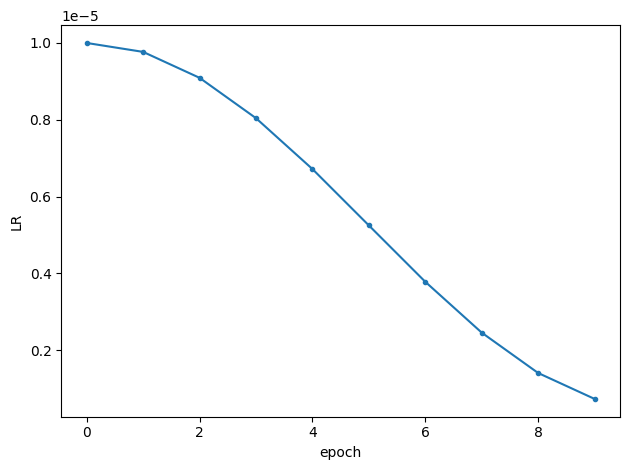

In [ ]:
model.train()

In [ ]:
model.predict()

## Check results

In [ ]:
im = sio.imread(f'{DATA_FOLDER}/output/model_outputs/2024_11_12_06_37_26/test_output/epoch_10_step_120_connected.tif')
print(im.max())
sio.imshow(im)

In [17]:
cells = cv2.resize(
    im.astype(float), (dapi_img.shape[1], dapi_img.shape[2]), interpolation=cv2.INTER_NEAREST
).astype(np.uint32)

In [ ]:
sio.imsave(f'{DATA_FOLDER}/output/model_outputs/2024_11_12_06_37_26/test_output/cells_resized.tif', cells)